In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("fast-food-dash-gshs.csv")
df.head()

,Year,LocationAbbr,LocationDesc,DataSource,Topic,Subtopic,ShortQuestionText,Greater_Risk_Question,Description,Data_Value_Symbol,...,Age,GeoLocation,TopicID,SubtopicID,QuestionCode,LocationId,StratID1,StratID2,StratID3,StratificationType
0,2011,YSM,Malaysia - M,GSHS,Dietary Behaviors,Fast Food,Fast food eating >= 3 day,Ate food from a fast food restaurant on three ...,during the 7 days before the survey,%,...,13-15,NaN,C05,C44,QNFF3G,NaN,S1,A7,YSM,Western Pacific
1,2015,PIA,Philippines (Luzon),GSHS,Dietary Behaviors,Fast Food,Fast food eating,Ate food from a fast food restaurant,during the 7 days before the survey,%,...,14,NaN,C05,C44,G10,NaN,S1,A3,PIA,Western Pacific
2,2012,AGJ,Argentina Jujuy,GSHS,Dietary Behaviors,Fast Food,Fast food eating >= 2 day,Ate food from a fast food restaurant on two or...,during the 7 days before the survey,%,...,Total,NaN,C05,C44,QNFF2G,NaN,S1,A1,AGJ,Americas
3,2012,AGU,Argentina Santa Fe,GSHS,Dietary Behaviors,Fast Food,Fast food eating,Ate food from a fast food restaurant,during the 7 days before the survey,%,...,14,NaN,C05,C44,G10,NaN,S7,A3,AGU,Americas
4,2014,AF,Afghanistan,GSHS,Dietary Behaviors,Fast Food,Fast food eating >= 3 day,Ate food from a fast food restaurant on three ...,during the 7 days before the survey,%,...,17,NaN,C05,C44,QNFF3G,NaN,S8,A6,AF,Eastern Mediterranean


In [78]:
print(f"Shape: {df.shape}")
print(f"Datatypes: {df.dtypes}")

Shape: (8325, 34)
Datatypes: Year                                         int64
LocationAbbr                                object
LocationDesc                                object
DataSource                                  object
Topic                                       object
Subtopic                                    object
ShortQuestionText                           object
Greater_Risk_Question                       object
Description                                 object
Data_Value_Symbol                           object
Data_Value_Type                             object
Greater_Risk_Data_Value                    float64
Greater_Risk_Data_Value_Footnote_Symbol    float64
Greater_Risk_Data_Value_Footnote           float64
Greater_Risk_Low_Confidence_Limit          float64
Greater_Risk_High_Confidence_Limit         float64
Lesser_Risk_Question                        object
Lesser_Risk_Data_Value                     float64
Lesser_Risk_Data_Value_Footnote_Symbol     float64
Le

In [79]:
df.isnull().sum()

Year                                          0
LocationAbbr                                  0
LocationDesc                                  0
DataSource                                    0
Topic                                         0
Subtopic                                      0
ShortQuestionText                             0
Greater_Risk_Question                         0
Description                                   0
Data_Value_Symbol                             0
Data_Value_Type                               0
Greater_Risk_Data_Value                     420
Greater_Risk_Data_Value_Footnote_Symbol    8325
Greater_Risk_Data_Value_Footnote           8325
Greater_Risk_Low_Confidence_Limit           420
Greater_Risk_High_Confidence_Limit          420
Lesser_Risk_Question                       5550
Lesser_Risk_Data_Value                      420
Lesser_Risk_Data_Value_Footnote_Symbol     8325
Lesser_Risk_Data_Value_Footnote            8325
Lesser_Risk_High_Confidence_Limit       

In [80]:
df = df.dropna(how="all", axis=1)
df.isnull().sum()

Year                                     0
LocationAbbr                             0
LocationDesc                             0
DataSource                               0
Topic                                    0
Subtopic                                 0
ShortQuestionText                        0
Greater_Risk_Question                    0
Description                              0
Data_Value_Symbol                        0
Data_Value_Type                          0
Greater_Risk_Data_Value                420
Greater_Risk_Low_Confidence_Limit      420
Greater_Risk_High_Confidence_Limit     420
Lesser_Risk_Question                  5550
Lesser_Risk_Data_Value                 420
Lesser_Risk_High_Confidence_Limit      420
Lesser_Risk_Low_Confidence_Limit       420
Sample_Size                              0
Sex                                      0
Age                                      0
TopicID                                  0
SubtopicID                               0
QuestionCod

In [81]:
df.describe()

,Year,Greater_Risk_Data_Value,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Lesser_Risk_Data_Value,Lesser_Risk_High_Confidence_Limit,Lesser_Risk_Low_Confidence_Limit,Sample_Size
count,8325.000000,7905.00000,7905.000000,7905.000000,7905.00000,7905.000000,7905.000000,8325.000000
mean,2012.182703,30.61226,25.304539,36.776273,69.38774,74.695461,63.223727,784.559279
std,1.960295,19.99248,18.700458,20.804602,19.99248,18.700458,20.804602,1352.460401
min,2009.000000,0.78850,0.088200,3.466500,4.77660,9.618400,2.309800,0.000000
25%,2011.000000,14.14650,10.136700,19.618700,55.06260,62.369300,47.475700,211.000000
50%,2012.000000,26.01760,20.367600,32.737700,73.98240,79.632400,67.262300,423.000000
75%,2014.000000,44.93740,37.630700,52.524300,85.85350,89.863300,80.381300,904.000000
max,2015.000000,95.22340,90.381600,97.690200,99.21150,99.911800,96.533500,28173.000000


In [83]:
df["Age"].value_counts()

13-15    1422
Total    1422
15       1422
13       1422
14       1422
17        405
13-17     405
16        405
Name: Age, dtype: int64

In [84]:
# change ranges to a single number in the age column
df.loc[df["Age"] == '13-15', "Age"] = np.trunc((13+15)/2).astype(int)
df.loc[df["Age"] == '13-17', "Age"] = np.trunc((13+17)/2).astype(int)
df.loc[df["Age"] == "Total", "Age"] = np.nan

In [85]:
# fill nans and convert type
df["Age"] = df["Age"].astype(float)
df["Age"] = df["Age"].fillna(np.trunc(df["Age"].mean()))
df["Age"] = df["Age"].astype(int)

In [87]:
df.describe()

,Year,Greater_Risk_Data_Value,Greater_Risk_Low_Confidence_Limit,Greater_Risk_High_Confidence_Limit,Lesser_Risk_Data_Value,Lesser_Risk_High_Confidence_Limit,Lesser_Risk_Low_Confidence_Limit,Sample_Size,Age
count,8325.000000,7905.00000,7905.000000,7905.000000,7905.00000,7905.000000,7905.000000,8325.000000,8325.000000
mean,2012.182703,30.61226,25.304539,36.776273,69.38774,74.695461,63.223727,784.559279,14.291892
std,1.960295,19.99248,18.700458,20.804602,19.99248,18.700458,20.804602,1352.460401,0.968305
min,2009.000000,0.78850,0.088200,3.466500,4.77660,9.618400,2.309800,0.000000,13.000000
25%,2011.000000,14.14650,10.136700,19.618700,55.06260,62.369300,47.475700,211.000000,14.000000
50%,2012.000000,26.01760,20.367600,32.737700,73.98240,79.632400,67.262300,423.000000,14.000000
75%,2014.000000,44.93740,37.630700,52.524300,85.85350,89.863300,80.381300,904.000000,15.000000
max,2015.000000,95.22340,90.381600,97.690200,99.21150,99.911800,96.533500,28173.000000,17.000000


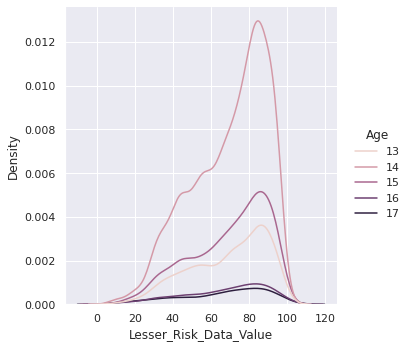

In [111]:
sns.set_theme()
sns.displot(data=df, x="Lesser_Risk_Data_Value", hue="Age", kind="kde");

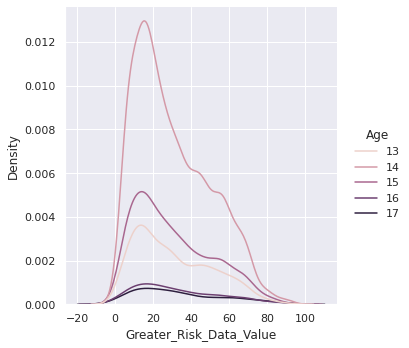

In [116]:
sns.set_theme()
sns.displot(data=df, x="Greater_Risk_Data_Value", hue="Age", kind="kde");

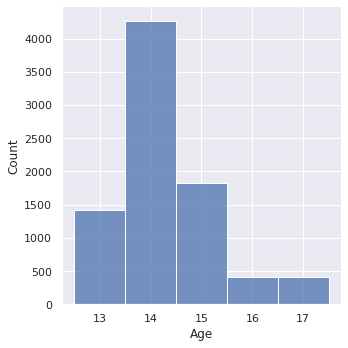

In [115]:
sns.displot(df, x="Age", discrete=True);